Data Augmentation and Advanced Techniques

Data Augmentation

    SMOTE (Synthetic Minority Over-sampling Technique): Already implemented.
    Random Under-sampling: Already implemented.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.neural_network import MLPClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical




In [ ]:
# Read the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project - Churn Prediction/BankChurners1.csv')

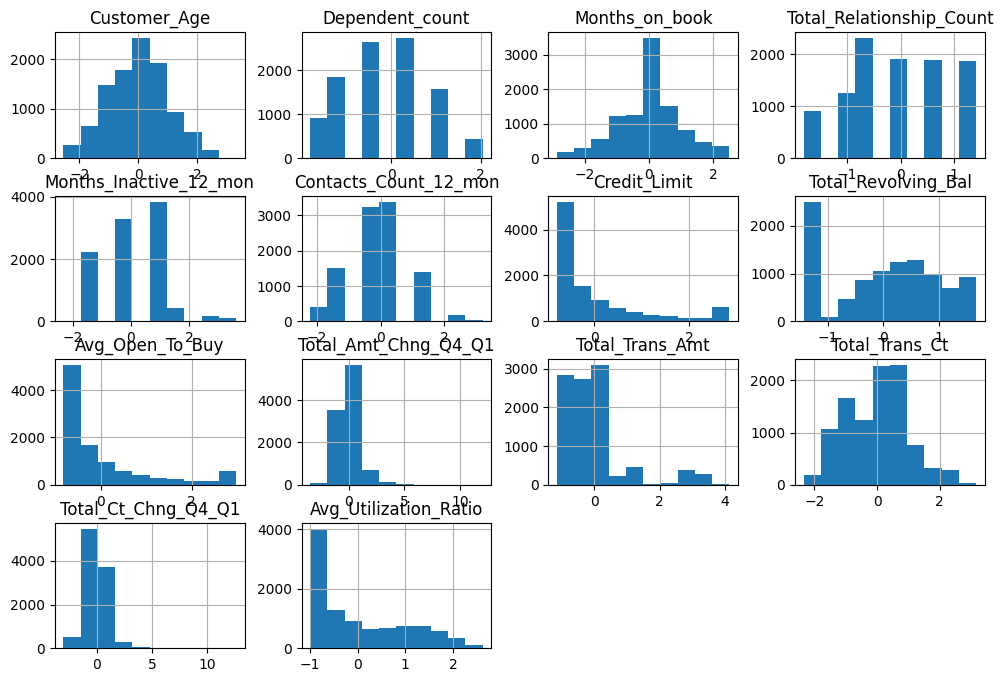


Class Distribution:
Attrition_Flag
1    8500
0    1627
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Drop the Customer ID column as it is not useful for modeling
dataset = dataset.drop(columns=['CLIENTNUM'])

# Normalize the numerical features
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
# scaler = MinMaxScaler()
# dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

# Standardize the numerical features
scaler = StandardScaler()
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

# Data distribution in all columns
dataset.hist(figsize=(12,8))
plt.show()

# Encoding categorical variables
# OneHotEncoding for 'Gender' and 'Marital_Status'
onehot_cols = ['Gender', 'Marital_Status']
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_onehot = pd.DataFrame(onehot_encoder.fit_transform(dataset[onehot_cols]), columns=onehot_encoder.get_feature_names_out(onehot_cols))
dataset = pd.concat([dataset.drop(columns=onehot_cols), encoded_onehot], axis=1)

# LabelEncoding for 'Attrition_Flag' (target variable)
label_encoder = LabelEncoder()
dataset['Attrition_Flag'] = label_encoder.fit_transform(dataset['Attrition_Flag'])

# Ordinal Encoding for 'Education_Level', 'Income_Category', 'Card_Category'
ordinal_mappings = {
    'Education_Level': {'Uneducated': 1, 'High School': 2, 'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6, 'Unknown': 7},
    'Income_Category': {'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3, '$80K - $120K': 4, '$120K +': 5, 'Unknown': 6},
    'Card_Category': {'Blue': 1, 'Silver': 2, 'Gold': 3, 'Platinum': 4}
}
for col, mapping in ordinal_mappings.items():
    dataset[col] = dataset[col].map(mapping)

# Checking the class distribution
print("\nClass Distribution:")
print(dataset['Attrition_Flag'].value_counts())


Oversampling and Undersampling Combined:

In [ ]:
# Combining SMOTE and Random Under-sampling
smote = SMOTE(random_state=42)
undersample = RandomUnderSampler(random_state=42)
pipeline = imbpipeline(steps=[('o', smote), ('u', undersample)])

# Resample the dataset
X = dataset.drop(columns=['Attrition_Flag'])
y = dataset['Attrition_Flag']
X_train, y_train = pipeline.fit_resample(X, y)

# Verifying the new class distribution
print("\nClass Distribution After Combining SMOTE and Under-sampling:")
print(pd.Series(y_train).value_counts())
print(y_train.shape)
print(X_train.shape)


Class Distribution After Combining SMOTE and Under-sampling:
Attrition_Flag
0    8500
1    8500
Name: count, dtype: int64
(17000,)
(17000, 21)


In [ ]:
# Split dataset into features and target
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


In [ ]:
# Using Logistic Regression
weighted_model = LogisticRegression()
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.15, random_state=42, stratify=dataset['Attrition_Flag'])
weighted_model.fit(X_tr, y_tr)
y_pred_weighted = weighted_model.predict(X_ts)

print("\nWeighted Model Performance:")
print(classification_report(y_ts, y_pred_weighted))



Weighted Model Performance:
              precision    recall  f1-score   support

           0       0.74      0.55      0.63       244
           1       0.92      0.96      0.94      1276

    accuracy                           0.90      1520
   macro avg       0.83      0.76      0.79      1520
weighted avg       0.89      0.90      0.89      1520



In [ ]:
# Using class weights in Logistic Regression
weighted_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
weighted_model.fit(X_train, y_train)
y_pred_weighted = weighted_model.predict(X_test)

print("\nWeighted Model Performance:")
print(classification_report(y_test, y_pred_weighted))


Weighted Model Performance:
              precision    recall  f1-score   support

           0       0.50      0.84      0.63       325
           1       0.96      0.84      0.90      1701

    accuracy                           0.84      2026
   macro avg       0.73      0.84      0.76      2026
weighted avg       0.89      0.84      0.86      2026



Class Weights in Models:

Deep Learning Approaches:

Epoch 1/20
6480/6480 [==============================] - 20s 3ms/step - loss: 0.3110 - accuracy: 0.8778 - val_loss: 0.2629 - val_accuracy: 0.8994
Epoch 2/20
6480/6480 [==============================] - 14s 2ms/step - loss: 0.2468 - accuracy: 0.9029 - val_loss: 0.2424 - val_accuracy: 0.9038
Epoch 3/20
6480/6480 [==============================] - 14s 2ms/step - loss: 0.2249 - accuracy: 0.9082 - val_loss: 0.2260 - val_accuracy: 0.9105
Epoch 4/20
6480/6480 [==============================] - 14s 2ms/step - loss: 0.2072 - accuracy: 0.9151 - val_loss: 0.2061 - val_accuracy: 0.9173
Epoch 5/20
6480/6480 [==============================] - 14s 2ms/step - loss: 0.1923 - accuracy: 0.9218 - val_loss: 0.2018 - val_accuracy: 0.9192
Epoch 6/20
6480/6480 [==============================] - 15s 2ms/step - loss: 0.1805 - accuracy: 0.9265 - val_loss: 0.1904 - val_accuracy: 0.9235
Epoch 7/20
6480/6480 [==============================] - 15s 2ms/step - loss: 0.1702 - accuracy: 0.9302 - val_loss: 0.1896 - val_ac

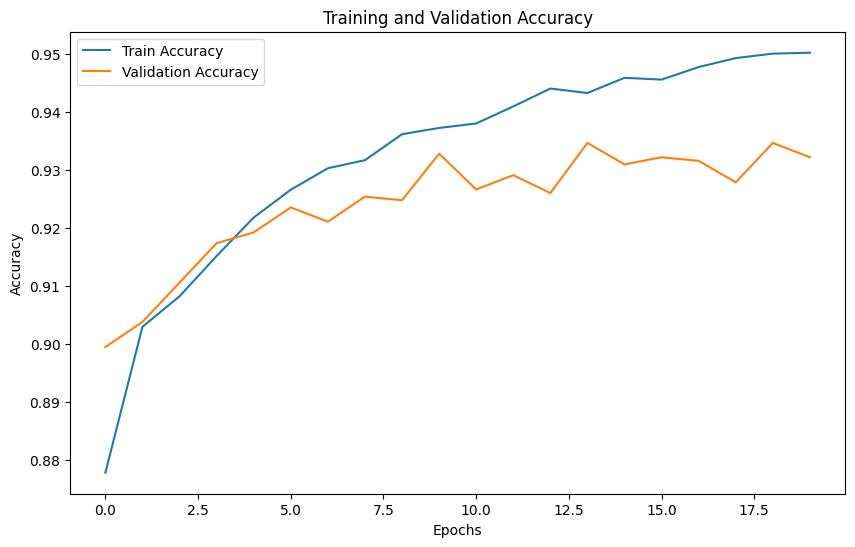

In [ ]:
# Convert target variable to categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Define a simple neural network model
nn_model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

nn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train, y_train_categorical, epochs=20, batch_size=1, validation_split=0.20, verbose=1)

# Evaluate the model
nn_scores = nn_model.evaluate(X_test, y_test_categorical, verbose=0)
print(f'\nNeural Network Model Performance: Accuracy = {nn_scores[1]:.2f}')

# Plotting training and validation accuracy
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
